In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
nobel = pd.read_csv('Nobel.csv')
nobel.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


## Which sex and which Country most commonly represented??

### Using diplay() instead of print() as display is having nice output as compared to print

In [3]:
# Displaying Number of nobel prizes handed
display(len(nobel.Prize))

# Displaying number of nobel prizes won by male and female
display(nobel.Sex.value_counts())

# display number of prizes won by top 10 countries
nobel['Birth Country'].value_counts().head(10)

969

Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Italy                        18
Canada                       18
Name: Birth Country, dtype: int64

# When diid USA started to dominate the Nobel Prize charts?
## Bcause during 1901 all winners were from Europe

In [4]:
# Calculating USA born winners per decade
nobel['usa_born_winner'] = nobel['Birth Country'] == 'United States of America'
nobel['decade'] = (np.floor(pd.Series(nobel.Year)/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index = False)['usa_born_winner'].mean()

# displaying usa born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


#### from table it is only giving a rough idea but to actually see when USA started to dominate we need a plot

## Visualizing USA Dominance

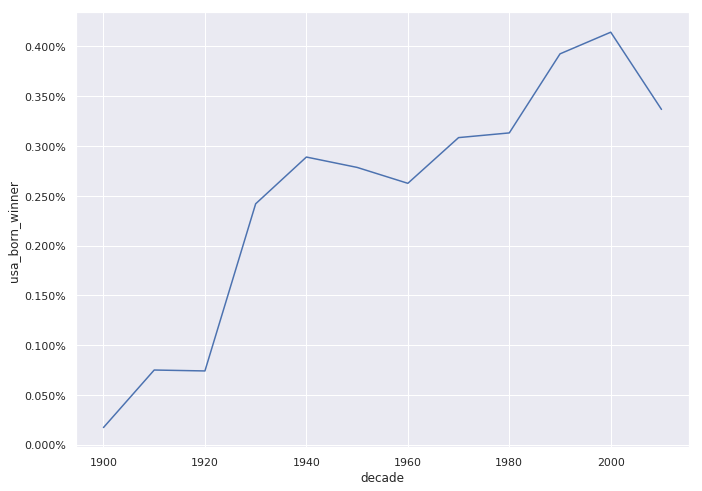

In [5]:
sns.set()

plt.rcParams['figure.figsize'] = [11,8]

#Plotting line plot for USA born winners
ax = sns.lineplot(prop_usa_winners['decade'],prop_usa_winners['usa_born_winner'])

# Adding %-formatting to the y- axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

## Gender of Typical Nobel Prize Winners

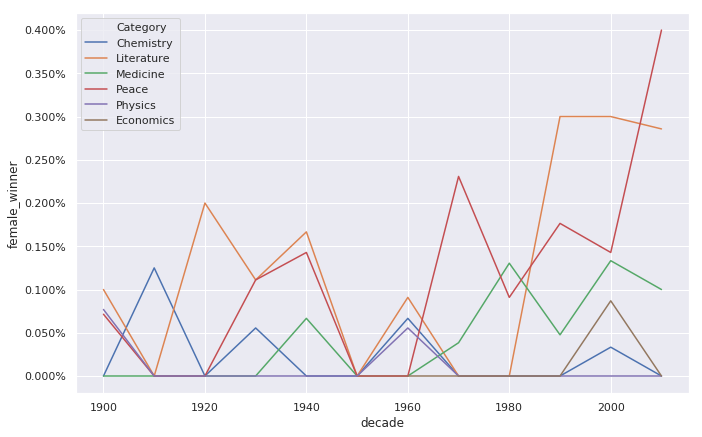

In [6]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel.Sex == "Female"
prop_female_winners = nobel.groupby(['decade','Category'],as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis

# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)
# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

## First woman to win Nobel Prize and in what category

In [7]:
nobel[nobel['Sex'] == 'Female'].nsmallest(1,'Year',keep='first')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


# Repeating Laureates

In [8]:
nobel.groupby("Full Name").filter(lambda x: len(x) >= 2)['Full Name'].value_counts()

Jack W. Szostak                                                                      3
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Mario R. Capecchi                                                                    2
Werner Forssmann                                                                     2
Tomas Lindahl                                                                        2
Petrus (Peter) Josephus Wilhelmus Debye                                              2
Finn E. Kydland                                                                      2
Dale T. Mortensen                                                                    2
Isamu Akasaki                                                                        2
Paul Ehrlich                                                                         2
Friedrich Bergius                                                                    2
Rudolf Ludwig Mössbauer                    

# Plotting Age of Nobel Prize Winners when they won prize

In [9]:
nobel.dropna(axis=0,how='any',inplace=True)

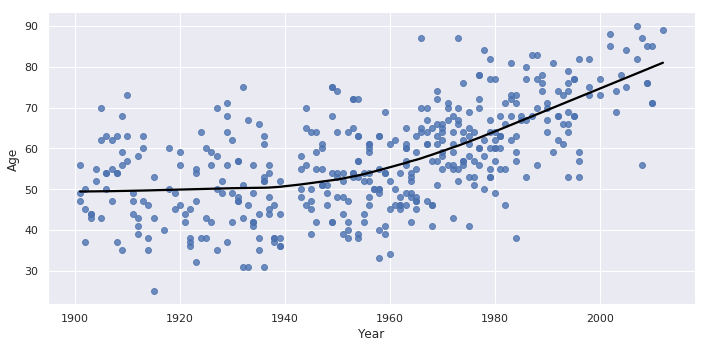

In [10]:
# Converting birth_date from String to datetime
nobel['Birth Date'] = pd.to_datetime(nobel["Birth Date"])
# Calculating the age of Nobel Prize winners
nobel['Age'] = nobel['Year'] - nobel['Birth Date'].dt.year

# Plotting the age of Nobel Prize winners

sns.lmplot(x='Year',y='Age',data=nobel, lowess=True, aspect=2, line_kws={"color" : "black"})


## Let's look at age trends within different prize categories.

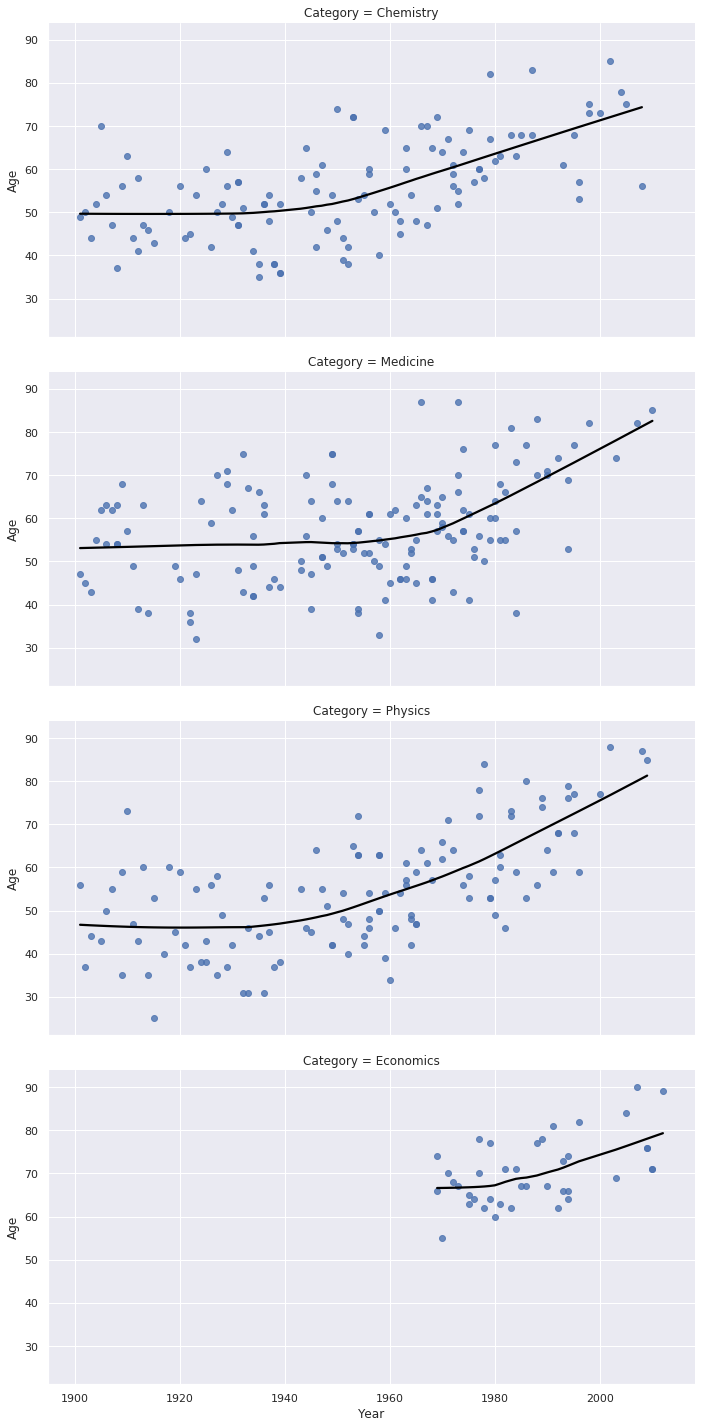

In [11]:
sns.lmplot(x='Year',y='Age',data=nobel, lowess=True, aspect=2, line_kws={"color" : "black"},row='Category')

# Oldest and Youngest Nobel Prize winners

In [12]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, "Age"))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, "Age")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner,Age
86,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,...,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,False,1910,False,25
